In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
alpaca_api_key = "PKGC1VSZO33ZTWIONX5I"
alpaca_secret_key = "Vy8sEvLiXCaCjfziEZR5rX2vivmcNENJNB1rw2qU"
alpaca_end_point = "https://paper-api.alpaca.markets"



api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    

In [ ]:
#Presidential Cycles for dataframe 
#o=obama, t=trump, b=biden 

In [4]:
#Obama DEM
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date_o = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date_o = pd.Timestamp("2017-01-19", tz="America/New_York").isoformat()


ticker_data_o = api.get_bars(
    ticker,
    timeframe,
    start=start_date_o,
    end=end_date_o
).df

In [5]:
sim=[]
for i in ticker:
    sim.append(ticker_data_o[ticker_data_o['symbol']==i].drop('symbol', axis=1))
sim

[                            open     high     low  close    volume  \
 timestamp                                                            
 2016-01-04 05:00:00+00:00  42.06  42.2800  41.610  42.27  21638628   
 2016-01-05 05:00:00+00:00  42.40  42.5000  41.970  42.16  16067215   
 2016-01-06 05:00:00+00:00  41.54  41.9150  41.385  41.64  13858365   
 2016-01-07 05:00:00+00:00  40.79  41.3162  40.390  40.41  16840659   
 2016-01-08 05:00:00+00:00  40.76  40.8950  40.040  40.09  19233104   
 ...                          ...      ...     ...    ...       ...   
 2017-01-12 05:00:00+00:00  49.44  49.5650  49.040  49.51   6862721   
 2017-01-13 05:00:00+00:00  49.51  49.7500  49.510  49.66   4832928   
 2017-01-17 05:00:00+00:00  49.53  49.6050  49.360  49.47   4825753   
 2017-01-18 05:00:00+00:00  49.61  49.6700  49.475  49.60   6157702   
 2017-01-19 05:00:00+00:00  49.60  49.7750  49.440  49.53   7250031   
 
                            trade_count       vwap  
 timestamp            

In [6]:
ticker_data_o.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,42.72,42.860,42.255,42.74,14430190,45774,42.588863,XLB
2016-01-05 05:00:00+00:00,42.92,42.920,42.400,42.72,9498958,34428,42.664281,XLB
2016-01-06 05:00:00+00:00,42.14,42.180,41.365,41.60,9307382,39628,41.709904,XLB
2016-01-07 05:00:00+00:00,40.84,41.245,40.250,40.47,12579674,50396,40.822059,XLB
2016-01-08 05:00:00+00:00,40.86,40.900,39.950,40.06,8700176,42116,40.498787,XLB


<AxesSubplot:xlabel='timestamp'>

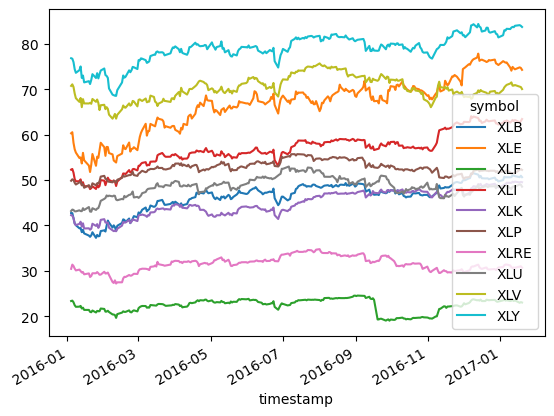

In [7]:
df_return_o = ticker_data_o[["close","symbol"]]
df_return_o = df_return_o.pivot(columns='symbol', values='close')
df_return_o.plot()

In [8]:
#Trump REP
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date_t = pd.Timestamp("2017-01-20", tz="America/New_York").isoformat()
end_date_t = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()


ticker_data_t = api.get_bars(
    ticker,
    timeframe,
    start=start_date_t,
    end=end_date_t
).df

In [9]:
sim=[]
for i in ticker:
    sim.append(ticker_data_t[ticker_data_t['symbol']==i].drop('symbol', axis=1))
sim

[                             open     high     low   close    volume  \
 timestamp                                                              
 2017-01-20 05:00:00+00:00   49.75   49.930   49.67   49.80   8755400   
 2017-01-23 05:00:00+00:00   49.75   49.910   49.54   49.89  11977629   
 2017-01-24 05:00:00+00:00   49.85   50.275   49.83   50.20   6510953   
 2017-01-25 05:00:00+00:00   50.47   50.680   50.43   50.68   9197791   
 2017-01-26 05:00:00+00:00   50.67   50.705   50.40   50.54   7126488   
 ...                           ...      ...     ...     ...       ...   
 2021-01-12 05:00:00+00:00  129.52  129.690  127.83  129.06   8544586   
 2021-01-13 05:00:00+00:00  129.23  130.280  128.98  129.88   6802582   
 2021-01-14 05:00:00+00:00  130.20  130.470  128.55  128.74   7812365   
 2021-01-15 05:00:00+00:00  128.55  129.120  127.16  127.42   6320564   
 2021-01-19 05:00:00+00:00  128.30  129.300  127.85  129.08   5784771   
 
                            trade_count        vw

In [10]:
ticker_data_t.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-20 05:00:00+00:00,50.82,51.175,50.7800,51.09,5006861,20993,51.014059,XLB
2017-01-23 05:00:00+00:00,51.09,51.270,50.8950,51.19,4161091,19099,51.065193,XLB
2017-01-24 05:00:00+00:00,51.38,52.630,51.3800,52.51,7980975,29073,52.348814,XLB
2017-01-25 05:00:00+00:00,52.73,52.910,52.3999,52.86,8220939,26769,52.740776,XLB
2017-01-26 05:00:00+00:00,52.87,53.260,52.7400,53.00,5320588,25676,52.961409,XLB


<AxesSubplot:xlabel='timestamp'>

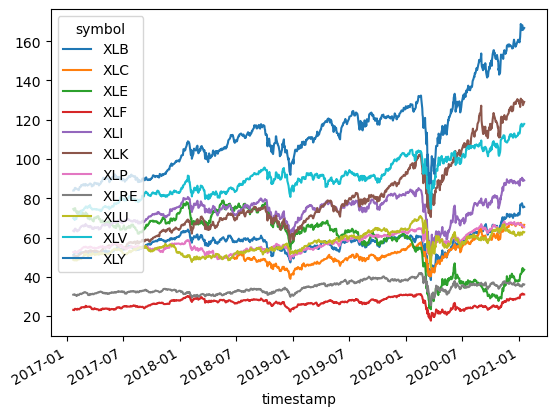

In [11]:
df_return_t = ticker_data_t[["close","symbol"]]
df_return_t = df_return_t.pivot(columns='symbol', values='close')
df_return_t.plot()

In [13]:
#Biden DEM 
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date_b = pd.Timestamp("2021-01-20", tz="America/New_York").isoformat()
end_date_b = pd.Timestamp("2023-05-10", tz="America/New_York").isoformat()


ticker_data_b = api.get_bars(
    ticker,
    timeframe,
    start=start_date_b,
    end=end_date_b
).df

In [15]:
sim=[]
for i in ticker:
    sim.append(ticker_data_b[ticker_data_b['symbol']==i].drop('symbol', axis=1))
sim

[                               open    high     low   close   volume  \
 timestamp                                                              
 2021-01-20 05:00:00+00:00  130.0701  132.10  129.89  131.64  5885017   
 2021-01-21 05:00:00+00:00  132.3500  133.78  131.64  133.34  4474102   
 2021-01-22 05:00:00+00:00  132.7800  133.50  132.51  132.83  5621759   
 2021-01-25 05:00:00+00:00  134.3300  134.79  130.70  134.01  9102612   
 2021-01-26 05:00:00+00:00  134.4100  134.62  133.52  134.03  4296729   
 ...                             ...     ...     ...     ...      ...   
 2023-05-04 04:00:00+00:00  147.6600  148.54  146.93  147.54  5430455   
 2023-05-05 04:00:00+00:00  148.9700  151.74  148.76  151.24  5741516   
 2023-05-08 04:00:00+00:00  150.9500  151.29  150.23  151.16  3397843   
 2023-05-09 04:00:00+00:00  150.3300  150.61  149.84  150.00  6006368   
 2023-05-10 04:00:00+00:00  151.3100  152.18  150.36  151.83  4710331   
 
                            trade_count        vw

In [ ]:
ticker_data_b.head()

<AxesSubplot:xlabel='timestamp'>

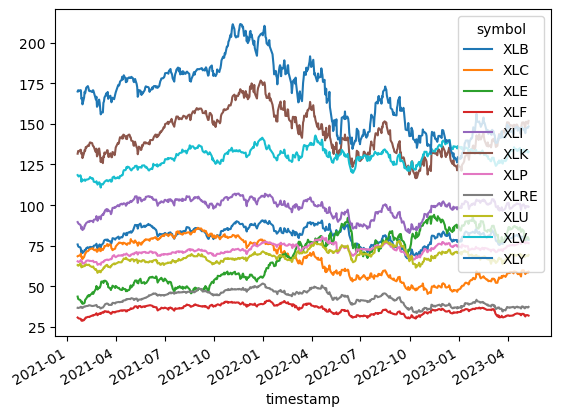

In [16]:
df_return_b = ticker_data_b[["close","symbol"]]
df_return_b = df_return_b.pivot(columns='symbol', values='close')
df_return_b.plot()

In [ ]:
#Just identify which sectors are performing the best thru the 3 Different dataframes and I have labeled each one with the corresponding prez w/ each df